In [ ]:
## Importing Packages
#By converting data frame to list am j losing the set of documents?
# source - https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alwer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from __future__ import unicode_literals
import spacy
##spacy.load('en')
#from spacy.lang.en import English
#parser = English()

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Set up log to external log file
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
## Importing Data

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
#Import my texts
import pandas as pd
import numpy as np

import sys
from importlib import reload
reload(sys)
stdout = sys.stdout
reload(sys)


<module 'sys' (built-in)>

In [ ]:
#sys.setdefaultencoding('utf-8')
sys.stdout = stdout
#encoding = 'unicode_escape'

#df = pd.read_csv('nova.csv', encoding="unicode_escape")
# "utf-8"   names = ['review'],    

#import csv
#df = pd.read_excel('video.csv') 
#print (df)

FileNotFoundError: [Errno 2] No such file or directory: 'video.csv'

In [ ]:
# Import Documents into Corpus
import glob
import os
file_list = glob.glob(os.path.join(os.getcwd(),"C:\\Users\\alwer\\Desktop\\Coding Working Group\\test", "*.txt"))

corpus = []

for file_path in file_list:
    with open(file_path, encoding = "utf8", errors='ignore') as f_input:
        corpus.append(f_input.read())
        
print(corpus[:2])  

# Change File List to Title - to work on
my_dir = "C:\\Users\\alwer\\Desktop\\Coding Working Group\\test"
filelist = []
filesList = []
os.chdir( my_dir )

# Step 2: Build up list of files:
for files in glob.glob("*.txt"):
    fileName, fileExtension = os.path.splitext(files)
    filelist.append(fileName) #filename without extension
    
# Import Documents into Dataframe
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'title': filelist, 'text': corpus})
df = corpus_df[['title', 'text']]
df

In [1]:
print(df.text.unique())
#df.head()          

NameError: ignored

In [ ]:
# Import Dataset
#df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json', encoding="utf-8")

#print(df.target_names.unique())
#df.head()

In [ ]:
## Prepare Data

In [ ]:
# Convert to list
data = df.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['\ufeffALIENS4 BY THEODORE STURGEON For Milton Amgott KILLDOZER! ^Before the '
 'race was the deluge, and before the deluge another race, whose nature it is '
 'not for mankind to understand. Not unearthly, not alien, for this was their '
 'earth and their home. There was a war between this race, which was a great '
 'one, and another. The other was truly alien, a sentient cloudform, an '
 'intelligent grouping of tangible electrons. It was spawned in mighty '
 'machines by some accident of a science beyond our aboriginal conception of '
 'technology. And then the machines, servants of the people, became the '
 'people’s masters, and great were the battles that followed. The '
 'electron-beings had the power to warp the delicate balances of '
 'atom-structure, and their life-medium was metal, which they permeated and '
 'used to their own ends. Each weapon the people developed was possessed and '
 'turned against them, until a time when the remnants of that vast '
 'civilization found

 'upward and to one side, and as he hit the ground Kelly reached out a long '
 'arm, and twisted his fingers into the man’s coarse hair, raised him up, and '
 'came across with his other fist in a punch that would have killed him had it '
 'landed square. But A1 managed to jerk to one side enough so that it only '
 'amputated a cheek. He fell and lay still. Kelly scrambled madly around in '
 'the sand for his welding-rod holder, found it and began to run again. He '
 'couldn’t see Tom at all now, and the Seven was standing in the surf, moving '
 'slowly from side to side, backing out, ravening. Kelly held the rod-clamp '
 'and its trailing cable blindly before him and ran straight at the machine. '
 'And then it came —that thin, soundless bolt of energy. But this time it had '
 'its full force, for poor old Peebles’ body had not been the ground that this '
 'swirling water offered. Daisy JEtta literally leaped backwards toward him, '
 'and the water around her tracks spouted upward in 

 'trained to—to—” He took another drink, but it and the preceding liquor '
 'seemed not to be helping him. He wanted to say to rule and he wanted to say '
 'to own, but he had wit enough about him to recognize that Sam would '
 'misunderstand. So he tried again. “Bom and bred to— live that—uh—way of life '
 'I mentioned before. It’s to the interest of those few people to invest their '
 'lives in things as they are, to keep them that way; in other words, to work '
 'for and uphold the law.” He leaned back with a flourish that The (Widget), '
 'The (Wadget) and Boff 181 somehow wasn’t as eloquent as he had hoped and '
 'very nearly upset his glass to boot. “Don’t the law contradict itself once '
 'in a while?” “Naturally!” O’Banion’s crystallizing concept of the nobility '
 'of his work was beginning to intoxicate him more than anything else. “But '
 'the very nature of our courts is a process of refinement, constant '
 'purification.” He leaned forward excitedly. “Look, laws are dreams

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

                  
## print data_words[:1])

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['aliens', 'by', 'theodore_sturgeon', 'for', 'milton', 'amgott', 'killdozer', 'before', 'the', 'race', 'was', 'the', 'deluge', 'and', 'before', 'the', 'deluge', 'another', 'race', 'whose', 'nature', 'it', 'is', 'not', 'for', 'mankind', 'to', 'understand', 'not', 'unearthly', 'not', 'alien', 'for', 'this', 'was', 'their', 'earth', 'and', 'their', 'home', 'there', 'was', 'war', 'between', 'this', 'race', 'which', 'was', 'great', 'one', 'and', 'another', 'the', 'other', 'was', 'truly', 'alien', 'sentient', 'cloudform', 'an', 'intelligent', 'grouping', 'of', 'tangible', 'electrons', 'it', 'was', 'spawned', 'in', 'mighty', 'machines', 'by', 'some', 'accident', 'of', 'science', 'beyond', 'our', 'aboriginal', 'conception', 'of', 'technology', 'and', 'then', 'the', 'machines', 'servants', 'of', 'the', 'people', 'became', 'the', 'people', 'masters', 'and', 'great', 'were', 'the', 'battles', 'that', 'followed', 'the', 'electron', 'beings', 'had', 'the', 'power', 'to', 'warp', 'the', 'delicate', 

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
from __future__ import unicode_literals

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
# data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\alwer\Anaconda3\envs\Word2Vec\lib\site-packages\en_core_web_sm -->
C:\Users\alwer\Anaconda3\envs\Word2Vec\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You do not have sufficient privilege to perform this operation.


OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops)
#id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
#texts = data_lemmatized
texts = data_words_nostops
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 8), (5, 1), (6, 8), (7, 1), (8, 1), (9, 9), (10, 3), (11, 1), (12, 2), (13, 4), (14, 6), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 3), (23, 1), (24, 1), (25, 4), (26, 1), (27, 4), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 2), (34, 2), (35, 2), (36, 2), (37, 2), (38, 4), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 40), (52, 7), (53, 6), (54, 1), (55, 1), (56, 4), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 21), (68, 1), (69, 2), (70, 1), (71, 1), (72, 9), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 3), (82, 2), (83, 1), (84, 5), (85, 1), (86, 3), (87, 2), (88, 1), (89, 1), (90, 1), (91, 3), (92, 1), (93, 4), (94, 1), (95, 4), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 11), (109, 1), (110,

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abet', 1),
  ('ability', 3),
  ('abjectly', 1),
  ('ablaze', 1),
  ('able', 8),
  ('abnormal', 1),
  ('aboard', 8),
  ('aboriginal', 1),
  ('abrupt', 1),
  ('abruptly', 9),
  ('absence', 3),
  ('absent', 1),
  ('absently', 2),
  ('absolute', 4),
  ('absolutely', 6),
  ('abstract', 1),
  ('academic', 1),
  ('academically', 1),
  ('acceleration', 1),
  ('accelerator', 1),
  ('accents', 1),
  ('accept', 3),
  ('acceptance', 3),
  ('accepted', 1),
  ('access', 1),
  ('accident', 4),
  ('accidentally', 1),
  ('accomplish', 4),
  ('accomplished', 1),
  ('accomplishes', 1),
  ('accomplishment', 2),
  ('accord', 1),
  ('according', 1),
  ('accordion', 2),
  ('account', 2),
  ('accountant', 2),
  ('accounting', 2),
  ('accuracy', 2),
  ('accurately', 4),
  ('accuse', 1),
  ('ace', 3),
  ('achieved', 1),
  ('achievement', 1),
  ('achieves', 1),
  ('acid', 1),
  ('acidly', 1),
  ('acids', 1),
  ('acknowledged', 1),
  ('acquisition', 1),
  ('acres', 1),
  ('acridly', 1),
  ('across', 40),
  ('

In [ ]:
## Build Topic Models

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=2,
                                           chunksize=100,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# print for 3
from __future__ import print_function

# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.018*"said" + 0.008*"one" + 0.008*"like" + 0.006*"back" + 0.006*"could" + 0.006*"know" + 0.006*"would" + 0.005*"got" + 0.005*"time" + 0.004*"get"'), (1, '0.009*"kidder" + 0.006*"one" + 0.005*"went" + 0.005*"got" + 0.005*"said" + 0.005*"little" + 0.005*"caviar" + 0.005*"conant" + 0.005*"away" + 0.005*"could"'), (2, '0.000*"said" + 0.000*"one" + 0.000*"would" + 0.000*"man" + 0.000*"time" + 0.000*"could" + 0.000*"two" + 0.000*"back" + 0.000*"know" + 0.000*"way"'), (3, '0.000*"said" + 0.000*"one" + 0.000*"like" + 0.000*"would" + 0.000*"back" + 0.000*"could" + 0.000*"man" + 0.000*"know" + 0.000*"time" + 0.000*"get"'), (4, '0.012*"said" + 0.009*"one" + 0.006*"man" + 0.005*"tristram" + 0.005*"like" + 0.005*"would" + 0.004*"back" + 0.004*"time" + 0.004*"could" + 0.004*"see"'), (5, '0.000*"said" + 0.000*"one" + 0.000*"like" + 0.000*"could" + 0.000*"would" + 0.000*"man" + 0.000*"time" + 0.000*"back" + 0.000*"two" + 0.000*"know"'), (6, '0.007*"could" + 0.006*"would" + 0.006*"one" + 0.005*"

In [ ]:
from __future__ import print_function

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.87242559633591

Coherence Score:  0.3424539026006969


In [ ]:
## how to find a specific term? 

## print(lda_model.get_term_topics("terrorist"))
#not working


[]


In [ ]:
with open('coherence.txt', 'w') as f:
    print("perplexity =", lda_model.log_perplexity(corpus), "coherence =", coherence_lda, file=f)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
##vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
##vis

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds')

pyLDAvis.show(vis)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8894/    [Ctrl-C to exit]


127.0.0.1 - - [26/Apr/2020 21:06:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2020 21:06:11] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2020 21:06:11] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2020 21:06:11] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2020 21:06:12] code 404, message Not Found
127.0.0.1 - - [26/Apr/2020 21:06:12] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


In [ ]:
#Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

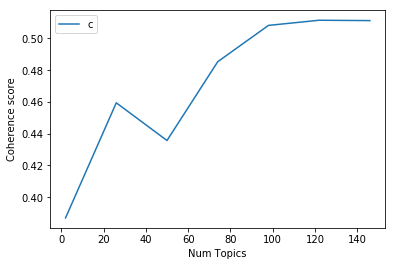

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


# Show graph
limit=160; start=2; step=24;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    


Num Topics = 2  has Coherence Value of 0.3869
Num Topics = 26  has Coherence Value of 0.4595
Num Topics = 50  has Coherence Value of 0.4357
Num Topics = 74  has Coherence Value of 0.4854
Num Topics = 98  has Coherence Value of 0.5082
Num Topics = 122  has Coherence Value of 0.5115
Num Topics = 146  has Coherence Value of 0.5113


In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.292*"people" + 0.066*"problem" + 0.037*"legally" + 0.035*"create" + '
  '0.026*"life" + 0.024*"world" + 0.017*"parent" + 0.017*"run" + '
  '0.016*"emotion" + 0.014*"worker"'),
 (1,
  '0.087*"liberal" + 0.071*"citizen" + 0.063*"american" + 0.038*"issue" + '
  '0.031*"call" + 0.026*"political" + 0.024*"control" + 0.023*"thing" + '
  '0.017*"power" + 0.017*"lose"'),
 (2,
  '0.280*"law" + 0.154*"parent" + 0.121*"break" + 0.049*"happen" + '
  '0.037*"enforce" + 0.024*"arrest" + 0.020*"person" + 0.017*"fault" + '
  '0.015*"follow" + 0.015*"violate"'),
 (3,
  '0.080*"obama" + 0.059*"https" + 0.055*"www" + 0.049*"href" + '
  '0.046*"officer" + 0.044*"watch" + 0.040*"woman" + 0.032*"youtube" + '
  '0.030*"amp" + 0.027*"satan"'),
 (4,
  '0.077*"give" + 0.057*"stop" + 0.055*"asylum" + 0.045*"time" + 0.027*"hold" '
  '+ 0.023*"catch" + 0.022*"guess" + 0.020*"idiot" + 0.020*"point" + '
  '0.018*"detain"'),
 (5,
  '0.221*"border" + 0.083*"illegally" + 0.071*"patrol" + 0.049*"cross" + '
  '

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

dominant_topic = df_dominant_topic.head(20)
with open('dominanttopic.csv', 'w') as f:
    print(dominant_topic, file=f)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]


In [ ]:
# Show
sent_topics_sorteddf_mallet.head(30)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1451,"people, problem, legally, create, life, world,...",Ed Dyer Some families presented themselves for...
1,1.0,0.6063,"liberal, citizen, american, issue, call, polit...","+angel aar ""In this deceitful American game of..."
2,2.0,0.1710,"law, parent, break, happen, enforce, arrest, p...",2014 it began! They were not enforcing the law...
3,3.0,0.2910,"obama, https, www, href, officer, watch, woman...","<a href=""https://www.silverdoctors.com/wp-cont..."
4,4.0,0.2536,"give, stop, asylum, time, hold, catch, guess, ...",Hold the families together in FEMA Camps. Hold...
5,5.0,0.2098,"border, illegally, patrol, cross, understand, ...",Well I’m mixed about it emotionally however I ...
6,6.0,0.6318,"mexico, child, mexican, immigrant, separate, c...",Ron R Why do ignorant Americans assume that an...
7,7.0,0.2077,"country, illegal, american, citizen, deport, a...",Let see a American Citizen goes illegally onto...
8,8.0,0.2606,"good, man, black, thing, open, evil, ms, opini...",After the Mexicans are gone..Trump will go aft...
9,9.0,0.1792,"kid, real, agree, answer, check, wrong, vote, ...",Jesse Jorgensen Yes. Every civilized nation wi...


In [ ]:
sorted_topics = sent_topics_sorteddf_mallet.head(30)
with open('phrases.csv', 'w') as f:
    print(sorted_topics, file=f)

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()


# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,12.0,"news, reporter, fake, hear, cbs, agenda, time,...",47.0,0.0560
1,0.0,"people, problem, legally, create, life, world,...",31.0,0.0369
2,13.0,"make, lie, talk, start, leave, cut, back, simp...",58.0,0.0690
3,4.0,"give, stop, asylum, time, hold, catch, guess, ...",37.0,0.0440
4,7.0,"country, illegal, american, citizen, deport, a...",46.0,0.0548
5,0.0,"people, problem, legally, create, life, world,...",55.0,0.0655
6,7.0,"country, illegal, american, citizen, deport, a...",39.0,0.0464
7,10.0,"democrat, president, separate, medium, questio...",35.0,0.0417
8,13.0,"make, lie, talk, start, leave, cut, back, simp...",41.0,0.0488
9,5.0,"border, illegally, patrol, cross, understand, ...",39.0,0.0464


In [ ]:
# http://localhost:8891/notebooks/anaconda2/Gensim%20LDA.ipynb

SyntaxError: invalid syntax (<ipython-input-44-86726efa9879>, line 1)

In [ ]:
import re
pos_re = re.compile(r'/(NOUN|ADJ|VERB|ADV)')


In [ ]:

def extract_dists(model, sf='text'):
    data = pyLDAvis.graphlab._extract_data(model, sf['bow'])
    vocab = data['vocab'] = [pos_re.sub('', t).replace('_', ' ') for t in data['vocab']]
    vis_data = pyLDAvis.prepare(**data)
    vis_topic_order = vis_data.topic_order
    new_order = np.array(vis_topic_order) - 1
    topic_ids = range(1, len(new_order) + 1)    
    data['topic_term_dists'] = pd.DataFrame(data['topic_term_dists'].T, index=vocab)[new_order]
    data['topic_term_dists'].columns = topic_ids
    data['doc_topic_dists'] = pd.DataFrame(data['doc_topic_dists'], index=sf['title'])[new_order]
    data['doc_topic_dists'].columns = topic_ids
    if vis_data:
        data['vis'] = vis_data
    return data

In [ ]:
model_data = extract_dists(doc_lda)

def topics_for(doc_name, doc_dist=model_data['doc_topic_dists']):
    return doc_dist.ix[doc_name].order(ascending=False)

def _sort_cols(df, cols):
    res = df[cols].apply(lambda probs: probs.order(ascending=False).index)
    return res.reset_index(drop=True)

def top_topic_terms(topic_ids, topic_term_dists=model_data['topic_term_dists']):
    return _sort_cols(topic_term_dists, topic_ids)

def top_docs(topic_ids, doc_topic_dists=model_data['doc_topic_dists']):
    return _sort_cols(doc_topic_dists, topic_ids)

def top_term_topics(term, topic_term_dists=model_data['topic_term_dists']):
    df = topic_term_dists.T[term].order(ascending=False)
    return df#.reset_index(drop=True)

def all_top_terms(topic_term_dists=model_data['topic_term_dists']):
    return top_topic_terms(topic_term_dists.columns)

def topic_docs(topic_id, doc_topic_dists=model_data['doc_topic_dists']):
    return doc_topic_dists[topic_id].order(ascending=False)

AttributeError: module 'pyLDAvis' has no attribute 'graphlab'

In [ ]:
code_topics = top_term_topics('kids')[0:10]
code_topics

NameError: name 'top_term_topics' is not defined

In [ ]:
code_topics = code_topics[code_topics > 0.01]
len(code_topics)

In [ ]:
top_docs(code_topics.index).head(5)

In [ ]:
code_topics = code_topics[code_topics > 0.02]

In [ ]:
top_docs(code_topics.index).head(5)

In [ ]:
docs_ordred_by_code = model_data['doc_topic_dists'][code_topics.index].sum(axis=1).order(ascending=False)
def fit_focused_model(ordered_docs, num_topics, num_iters=100, threshold=0.1):
    subset = set(ordered_docs[ordered_docs > threshold].index)
    print('Keeping %.2f%% of the corpus...' % (100 * (len(subset) / len(ordered_docs))))
    # I should have kept the doc index around, oh well..
    stories_subset = stories_sf[stories_sf['title'].apply(lambda t: t in subset)]
    bows = stories_subset['bow']    
    print('Fitting model...')
    tm = gl.topic_model.create(bows, num_topics, num_iterations=num_iters)
    print('Creating vis data...')
    data = extract_dists(tm, stories_subset)
    data['model'] = tm
    return data
code_model = fit_focused_model(docs_ordred_by_code, 40, num_iters=500, threshold=0.25)

In [ ]:
code_model['vis']